In [85]:
# Load the necessarry packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import the necessarry ML packages

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the test and train data into dataframes

train_df = pd.read_csv(r'./IS_train.csv')
test_df = pd.read_csv(r'./IS_test.csv')

In [3]:
# Check the train data

train_df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
# Check the test data

test_df.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [5]:
# Size of the data frame

print(train_df.shape[0]," rows and ", train_df.shape[1],"columns are there in train_df")
print(test_df.shape[0]," rows and ", test_df.shape[1],"columns are there in test_df")

79853  rows and  12 columns are there in train_df
34224  rows and  11 columns are there in test_df


** So the test data and train data have different dimensions. And the target column which is present in train data is missing in the test data. That is the output column which we are going to predict.  **

** Since, we need to classify the given IDs into loan paid on time and not paid on time, this is a classification problem. Thus, for this purpose we are going to use decision tree classifier model present in sklearn package. **

# Data Exploration

In [6]:
# Check if there is any missing or anamalous data in train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
target                              79853 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 7.3+ MB


** It can be seen from the above that there are some missing values present in Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late and application_underwriting_score columns of the train dataset.**

** Let us check for the test dataset too. **

In [91]:
# Check if there is any missing or anamalous data in test dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 11 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_days                         34224 non-null int64
Income                              34224 non-null int64
Count_3-6_months_late               34193 non-null float64
Count_6-12_months_late              34193 non-null float64
Count_more_than_12_months_late      34193 non-null float64
application_underwriting_score      32901 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null object
residence_area_type                 34224 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 2.9+ MB


** It can be seen from the above that same anomalies are present in the test datset too.**

In [8]:
# A bit more details on missing data on train data

total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,application_underwriting_score,Count_more_than_12_months_late,Count_6-12_months_late,Count_3-6_months_late,target,residence_area_type,sourcing_channel,no_of_premiums_paid,Income,age_in_days,perc_premium_paid_by_cash_credit,id
Total,2974.000000,97.000000,97.000000,97.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,3.724343,0.121473,0.121473,0.121473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# A bit more details on missing data on test data

total = test_df.isnull().sum().sort_values(ascending = False)
percent = (test_df.isnull().sum()/test_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,application_underwriting_score,Count_more_than_12_months_late,Count_6-12_months_late,Count_3-6_months_late,residence_area_type,sourcing_channel,no_of_premiums_paid,Income,age_in_days,perc_premium_paid_by_cash_credit,id
Total,1323.000000,31.00000,31.00000,31.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,3.865708,0.09058,0.09058,0.09058,0.0,0.0,0.0,0.0,0.0,0.0,0.0


** So it is clear from the data exploration that the anamalous columns contains some missing values and it needs to be cleaned before machine learning. **

** Before cleaning the data let us make a copy of the train and test data frame so that the original data frame is left unscathed. **

In [10]:
# Copy the original test data frame to another data frame

train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

# Data Cleaning

** Since both test and train dataframes contains categorical variables in the sourcing channel and residence_area_type columns they have to be replaced with numerical values before feeding into machine learning algorithm**

In [11]:
# Getting the counts of categorical variables so that they can be replaced with numeric values

print("In Train dataframe:")
print("-------------------")
train_df_copy['sourcing_channel'].value_counts()

In Train dataframe:
-------------------


A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [12]:
print("In Test dataframe:")
print("------------------")
test_df_copy['sourcing_channel'].value_counts()

In Test dataframe:
------------------


A    18672
B     6923
C     5146
D     3222
E      261
Name: sourcing_channel, dtype: int64

In [13]:
print("In Train dataframe:")
print("-------------------")
train_df_copy['residence_area_type'].value_counts()

In Train dataframe:
-------------------


Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

In [14]:
print("In Test dataframe:")
print("------------------")
test_df_copy['residence_area_type'].value_counts()

In Test dataframe:
------------------


Urban    20608
Rural    13616
Name: residence_area_type, dtype: int64

In [15]:
# Replace the categorical variables in sourcing channel with numbers 0-4 and in residence area type with numbers 0-1

cleanup_nums = {"sourcing_channel":     {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4},
                "residence_area_type": {"Urban": 0, "Rural": 1}}

In [16]:
# Replace the categorical variables with the above numerical codes in train dataframe

train_df_copy.replace(cleanup_nums, inplace=True)
train_df_copy.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,2,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,2,1,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,1,0,1


In [17]:
# Replace the categorical variables with the above numerical codes in test dataframe

test_df_copy.replace(cleanup_nums, inplace=True)
test_df_copy.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,0,1
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,0,0
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,1,0
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,1,1
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,0,1


In [18]:
# Replace missing values in the columns named count with 0 in train dataframe

train_df_copy['Count_3-6_months_late'].fillna(0, inplace=True)
train_df_copy['Count_6-12_months_late'].fillna(0, inplace=True)
train_df_copy['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [19]:
# Replace missing values in the columns named count with 0 in test dataframe

test_df_copy['Count_3-6_months_late'].fillna(0, inplace=True)
test_df_copy['Count_6-12_months_late'].fillna(0, inplace=True)
test_df_copy['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [20]:
# Replace missing values in the Application Underwriting score with the mean of the column in train dataframe

train_df_copy['application_underwriting_score'].fillna(train_df_copy['application_underwriting_score'].mean(), inplace=True)

In [21]:
# Replace missing values in the Application Underwriting score with the mean of the column in test dataframe

test_df_copy['application_underwriting_score'].fillna(test_df_copy['application_underwriting_score'].mean(), inplace=True)

** Further, the age is given in mumber of days. It would be easy if we can deal the age in number of years. So let's transform that column. **

In [22]:
# Replace age_in_days to age_in_years in train dataframe

train_df_copy['age_in_days'].replace(train_df_copy['age_in_days']/365, inplace=True)
train_df_copy.head()

# This process will take time as the transformation has to be done for a large number of columns

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,38.030137,355060,0.0,0.0,0.0,99.02,13,2,0,1
1,41492,0.010,58.021918,315150,0.0,0.0,0.0,99.89,21,0,0,1
2,31300,0.917,76.038356,84140,2.0,3.0,1.0,98.69,7,2,1,0
3,19415,0.049,62.030137,250510,0.0,0.0,0.0,99.57,9,0,0,1
4,99379,0.052,26.035616,198680,0.0,0.0,0.0,99.87,12,1,0,1


In [23]:
# Replace age_in_days to age_in_years in test dataframe

test_df_copy['age_in_days'].replace(test_df_copy['age_in_days']/365, inplace=True)
test_df_copy.head()

# This process will take time as the transformation has to be done for a large number of columns

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,40.016438,51150,0.0,0.0,0.0,99.890000,7,0,1
1,81136,0.124,30.021918,285140,0.0,0.0,0.0,98.930000,19,0,0
2,70762,1.000,72.030137,186030,0.0,0.0,0.0,99.061898,2,1,0
3,53935,0.198,63.013699,123540,0.0,0.0,0.0,99.000000,11,1,1
4,15476,0.041,39.019178,200020,1.0,0.0,0.0,99.170000,14,0,1


In [24]:
# Rename age_in_days to age_in_years in train dataframe

train_df_copy.rename(columns={'age_in_days':'age_in_years'}, inplace=True)
train_df_copy.head()

,id,perc_premium_paid_by_cash_credit,age_in_years,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,38.030137,355060,0.0,0.0,0.0,99.02,13,2,0,1
1,41492,0.010,58.021918,315150,0.0,0.0,0.0,99.89,21,0,0,1
2,31300,0.917,76.038356,84140,2.0,3.0,1.0,98.69,7,2,1,0
3,19415,0.049,62.030137,250510,0.0,0.0,0.0,99.57,9,0,0,1
4,99379,0.052,26.035616,198680,0.0,0.0,0.0,99.87,12,1,0,1


In [25]:
# Rename age_in_days to age_in_years in test dataframe

test_df_copy.rename(columns={'age_in_days':'age_in_years'}, inplace=True)
test_df_copy.head()

,id,perc_premium_paid_by_cash_credit,age_in_years,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,40.016438,51150,0.0,0.0,0.0,99.890000,7,0,1
1,81136,0.124,30.021918,285140,0.0,0.0,0.0,98.930000,19,0,0
2,70762,1.000,72.030137,186030,0.0,0.0,0.0,99.061898,2,1,0
3,53935,0.198,63.013699,123540,0.0,0.0,0.0,99.000000,11,1,1
4,15476,0.041,39.019178,200020,1.0,0.0,0.0,99.170000,14,0,1


In [26]:
# Check if there is still any missing or anamalous data in train dataframe

train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_years                        79853 non-null float64
Income                              79853 non-null int64
Count_3-6_months_late               79853 non-null float64
Count_6-12_months_late              79853 non-null float64
Count_more_than_12_months_late      79853 non-null float64
application_underwriting_score      79853 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null int64
residence_area_type                 79853 non-null int64
target                              79853 non-null int64
dtypes: float64(6), int64(6)
memory usage: 7.3 MB


In [27]:
# Further verification on missing data if any

total = train_df_copy.isnull().sum().sort_values(ascending = False)
percent = (train_df_copy.isnull().sum()/train_df_copy.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,target,residence_area_type,sourcing_channel,no_of_premiums_paid,application_underwriting_score,Count_more_than_12_months_late,Count_6-12_months_late,Count_3-6_months_late,Income,age_in_years,perc_premium_paid_by_cash_credit,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Check if there is still any missing or anamalous data in test dataframe

test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 11 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_years                        34224 non-null float64
Income                              34224 non-null int64
Count_3-6_months_late               34224 non-null float64
Count_6-12_months_late              34224 non-null float64
Count_more_than_12_months_late      34224 non-null float64
application_underwriting_score      34224 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null int64
residence_area_type                 34224 non-null int64
dtypes: float64(6), int64(5)
memory usage: 2.9 MB


In [29]:
# Further verification on missing data if any

total = test_df_copy.isnull().sum().sort_values(ascending = False)
percent = (test_df_copy.isnull().sum()/test_df_copy.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,residence_area_type,sourcing_channel,no_of_premiums_paid,application_underwriting_score,Count_more_than_12_months_late,Count_6-12_months_late,Count_3-6_months_late,Income,age_in_years,perc_premium_paid_by_cash_credit,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


** Now the data is cleaned and ready for further exploration**

# Features Correlation

In [30]:
# Details of the data

train_df_copy.drop('id', axis=1).describe()

,perc_premium_paid_by_cash_credit,age_in_years,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
count,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,0.314288,51.309628,2.088472e+05,0.248369,0.078093,0.059935,99.067291,10.863887,0.822799,0.396604,0.937410
std,0.334915,14.082934,4.965826e+05,0.691102,0.436251,0.311840,0.725892,5.170687,1.052060,0.489195,0.242226
min,0.000000,21.038356,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000,0.000000,0.000000
25%,0.034000,40.041096,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,0.000000,0.000000,1.000000
50%,0.167000,50.035616,1.665600e+05,0.000000,0.000000,0.000000,99.180000,10.000000,0.000000,0.000000,1.000000
75%,0.538000,61.035616,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,2.000000,1.000000,1.000000
max,1.000000,91.013699,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,4.000000,1.000000,1.000000


In [31]:
# Correlation between each columns

train_df_copy.drop('id', axis=1).corr()

,perc_premium_paid_by_cash_credit,age_in_years,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
perc_premium_paid_by_cash_credit,1.000000,-0.007929,-0.031868,0.213011,0.213953,0.167213,-0.138006,-0.152837,0.081999,0.001562,-0.240980
age_in_years,-0.007929,1.000000,0.004017,0.004478,-0.001253,-0.001668,-0.002389,0.008911,0.008719,-0.002187,0.004735
Income,-0.031868,0.004017,1.000000,-0.001296,-0.017292,-0.012341,0.062637,0.079078,0.059770,-0.003392,0.016541
Count_3-6_months_late,0.213011,0.004478,-0.001296,1.000000,0.204286,0.296139,-0.082306,0.076435,0.058741,-0.001513,-0.246469
Count_6-12_months_late,0.213953,-0.001253,-0.017292,0.204286,1.000000,0.266337,0.004581,-0.092593,0.027668,0.000809,-0.284034
Count_more_than_12_months_late,0.167213,-0.001668,-0.012341,0.296139,0.266337,1.000000,-0.031527,-0.021409,0.029243,0.001219,-0.238482
application_underwriting_score,-0.138006,-0.002389,0.062637,-0.082306,0.004581,-0.031527,1.000000,-0.262585,-0.047667,-0.004916,0.067333
no_of_premiums_paid,-0.152837,0.008911,0.079078,0.076435,-0.092593,-0.021409,-0.262585,1.000000,0.040874,-0.003447,0.022664
sourcing_channel,0.081999,0.008719,0.059770,0.058741,0.027668,0.029243,-0.047667,0.040874,1.000000,0.002067,-0.041557
residence_area_type,0.001562,-0.002187,-0.003392,-0.001513,0.000809,0.001219,-0.004916,-0.003447,0.002067,1.000000,-0.001667


** The same correlation expressed in a heatmap **

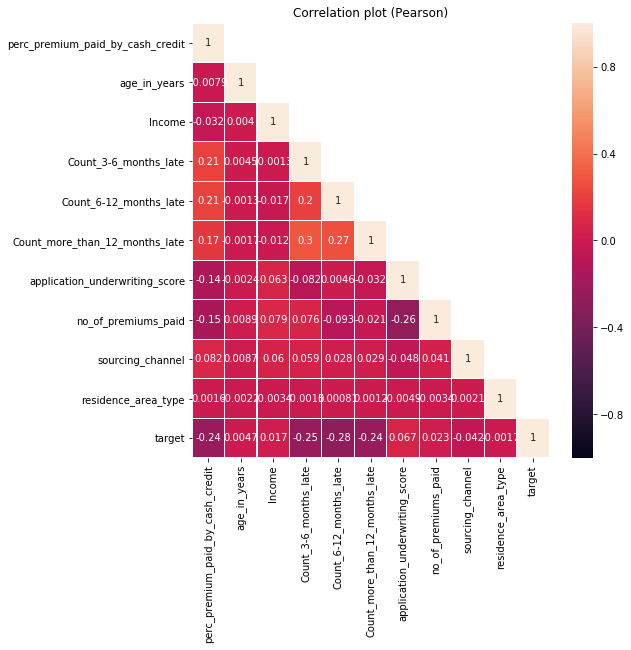

In [32]:
plt.figure(figsize = (8,8))
plt.title('Correlation plot (Pearson)')
corr = train_df_copy.drop('id', axis=1).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

# Data Visulization and outliers

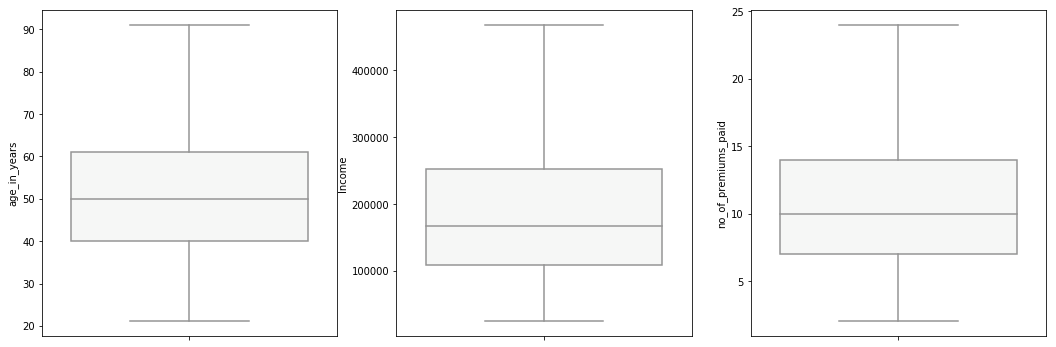

In [33]:
# Check outliers in age, income and no_of_premium_paid

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, figsize=(18,6))
s = sns.boxplot(ax = ax1, y="age_in_years", data=train_df_copy, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, y="Income", data=train_df_copy, palette="PRGn",showfliers=False)
s = sns.boxplot(ax = ax3, y="no_of_premiums_paid", data=train_df_copy, palette="PRGn",showfliers=False)
plt.show()

** From the above box plots it is clear that there are no putliers in those three columns **

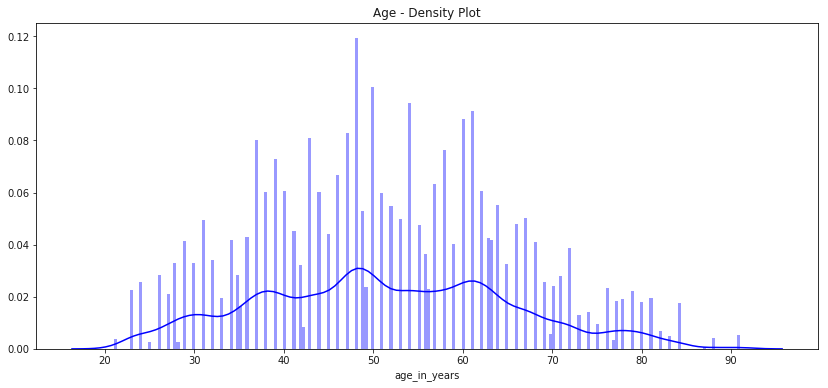

In [34]:
# Create an age density plot to see the distribution of Age

plt.figure(figsize = (14,6))
plt.title('Age - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(train_df_copy['age_in_years'],kde=True,bins=200, color="blue")
plt.show()

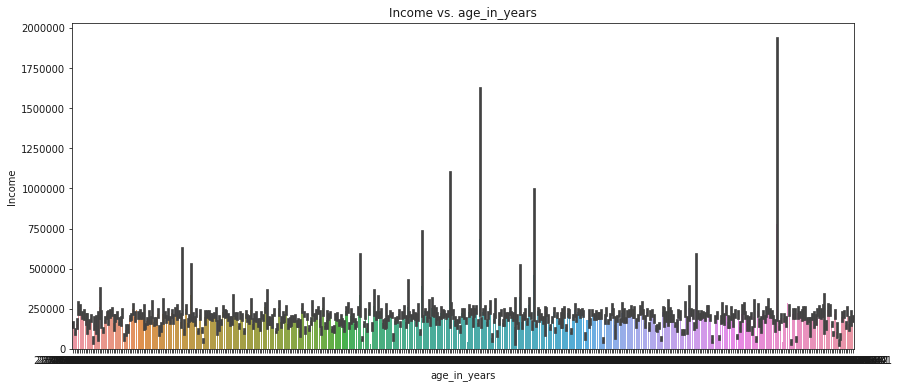

In [35]:
# Create a bar plot to see the distribution of income vs.age

plt.figure(figsize = (14,6))
plt.title('Income vs. age_in_years')
#sns.set_color_codes("pastel")
sns.barplot(x=train_df_copy['age_in_years'], y=train_df_copy['Income'], data=train_df_copy)
plt.show()

# Initial Predictive modelling

** First we will train the model by splitting the train data set using train_test_split in sklearn package **

In [36]:
# create the copy of target variable

target_copy = train_df_copy['target'].copy() #--> This is the Y variable in train test split
target_copy.sample(5)

27668    0
57210    1
11390    1
11677    1
22889    1
Name: target, dtype: int64

In [37]:
# Create the X variable for train

X = train_df_copy.drop(['id','target'],axis=1).copy() #--> This is the X in train test split
X.columns

Index(['perc_premium_paid_by_cash_credit', 'age_in_years', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [79]:
# split the df into train and test in such a way so that these two don't communicate during the training

X_train, X_test, y_train, y_test = train_test_split(X, target_copy, test_size=0.42858, random_state=42)

# The test has been split according to this ration train dataframe/test dataframe = 79853/34224 = 0.42858

In [92]:
# Classifier Creation

classifier = DecisionTreeClassifier(max_depth=5, random_state=None) 

# Classifier Training

classifier.fit(X_train, y_train)

# Prediction on the test

predictions = classifier.predict(X_test)

# Accuracy of the prediction

accuracy_score(y_true = y_test, y_pred = predictions)

0.9378214118747078

** Even though we got a good score in the above classifier it may be prone to over fitting. So let us tune the hyperparameters **

In [101]:
#create the classifier

classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# training the classifier

classifier.fit(X_train, y_train)

# Prediction on the test

predictions = classifier.predict(X_test)

# Accuracy of the test

accuracy_score(y_true = y_test, y_pred = predictions)

0.93767531556802242

# Decision Tree Visualization

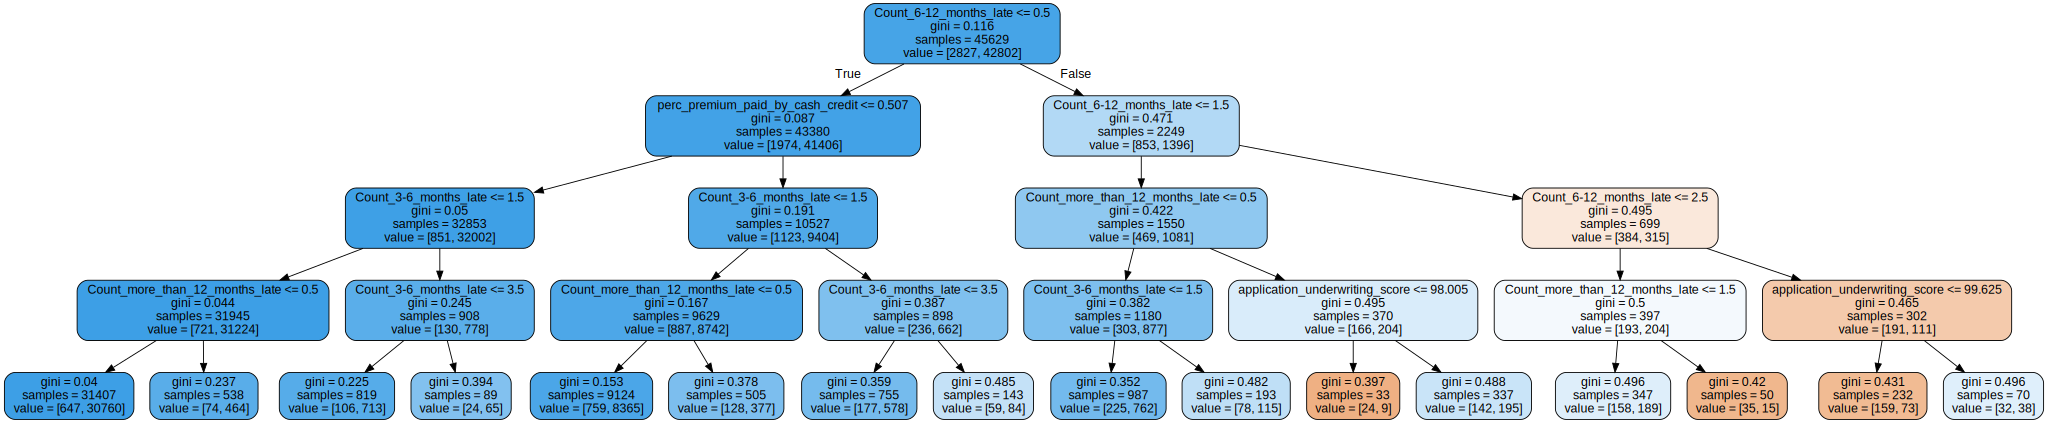

In [82]:
from sklearn import tree
import graphviz

feature_names = X.columns

dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, feature_names = feature_names)
graph = graphviz.Source(dot_data)  
graph

In [94]:
# Now do the predictions on the test dataset

predictions = classifier.predict(test_df_copy.drop('id', axis=1))

In [95]:
# see how good we did on the test

accuracy_score(y_true = y_test, y_pred = predictions)

0.93080878915381016

** The model fits well with the prediction!! **

In [102]:
# Create an empty data frame to store the predictions

submission = pd.DataFrame()

In [103]:
# creating a target column and saving the predictions in it

submission['target'] = predictions

In [104]:
# Add the id column to the submission dataframe

merged_submission = pd.concat([test_df_copy['id'], submission], ignore_index=True, axis=1)
merged_submission.head()

,0,1
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1


In [105]:
# Rename the datframe columns

merged_submission.rename(columns={0:'id', 1:'target'}, inplace=True)
merged_submission.head()

,id,target
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1


In [106]:
# Convert the output datframe to csv

merged_submission.to_csv('correct_submission.csv', header=True, index=False)

# References

1. Credit Card Default: a very pedagogical notebook: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook

2. Default of Credit Card Clients - Predictive Models: https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models